# Assignment 2 - Data Wrangling II

#### Perform the following operations using Python on any open source dataset (eg. data.csv)
##### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
##### inconsistencies, use any of the suitable techniques to deal with them. 
##### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
##### techniques to deal with them. 
##### 3. Apply data transformations on at least one of the variables. The purpose of this 
##### transformation should be one of the following reasons: to change the scale for better 
##### understanding of the variable, to convert a non-linear relation into a linear one, or to 
##### decrease the skewness and convert the distribution into a normal distribution. 

In [255]:
import pandas as pd
import numpy as np
from scipy import stats

In [256]:
#Loading the dataset StudentsPerformance

data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 

In [257]:
#Total number of null entries in dataset cols
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [258]:
#handling the null values in columns with NA data
#replacing NA with 0

data['math score'] = pd.to_numeric(data['math score'],errors = 'coerce')

data["math score"].fillna(value = data["math score"].mean(), inplace = True)
data["reading score"].fillna(value = data['reading score'].mean(), inplace = True)
data["writing score"].fillna(value = data['writing score'].mean(), inplace = True)

In [259]:
#Updated Cols with no NA values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

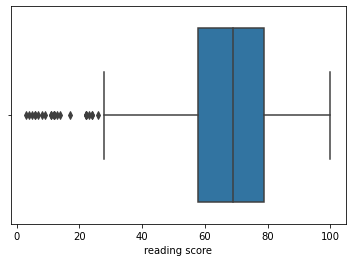

In [260]:
#using boxplot to identify the outliers

import seaborn as sns
sns.boxplot(data['reading score'])

In [261]:
#finding outliers of reading score using zscore method

z = np.abs(stats.zscore(data['reading score']))

indices = np.where(z>2)
print(indices[0])

[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  59  76  91 211 327 363 466 596 601 706 810 895 896 980]


In [262]:
#removing the outliers

ndata = data.drop(data.index[indices[0]])

# print(ndata)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

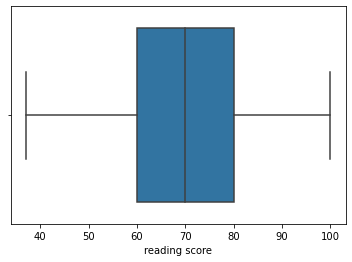

In [263]:
sns.boxplot(ndata['reading score'])

### 3. Data Transformations

<AxesSubplot:xlabel='reading score', ylabel='Density'>

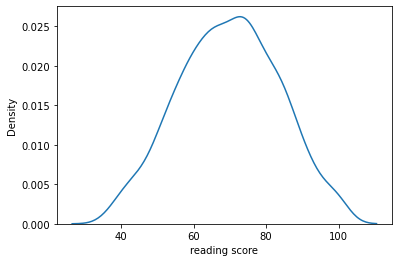

In [264]:
sns.kdeplot(ndata['reading score'])


<AxesSubplot:xlabel='writing score', ylabel='Density'>

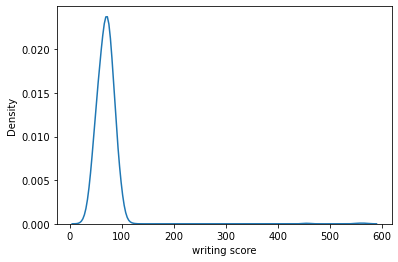

In [265]:
#reducing the skewness by using reciprocal method

ndata['reading score'] = 1/(data['reading score'])
sns.kdeplot(ndata['writing score'])
